In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import dill
from IPython.core import display as ICD  # to print multiple nice pandas tables
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tqdm
from tqdm import tqdm_notebook, tnrange
sns.set()

In [2]:
import datasets
import classify
from simple_model import SimpleModel
from testing import test_simple_model

In [3]:
from collections import defaultdict
results = defaultdict(dict)
dump = defaultdict(dict)

In [5]:
def gradient_w(model, dataset, alpha=0.01, epochs=150):
    train_scores = []
    valid_scores = []
    test_scores = []
    model.fit(dataset.train_samples(), dataset.train_labels())
    if epochs is None:
        t = tnrange(100000)
    else:
        t = tnrange(epochs)
    for e in t:
        w = np.copy(model.w)
        w -= alpha * model.dw(dataset.train_samples(), dataset.train_labels())
        model.w = np.copy(w)
        model.fit(dataset.train_samples(), dataset.train_labels())
        train_score = model.score(dataset.train_samples(), dataset.train_labels())
        valid_score = model.score(dataset.valid_samples(), dataset.valid_labels())
        test_score = model.score(dataset.test_samples(), dataset.test_labels())
        train_scores.append(train_score)
        valid_scores.append(valid_score)
        test_scores.append(test_score)
        t.set_postfix(train_score=train_score, valid_score=valid_score, test_score=test_score)
        if epochs is None and e > 20:
            end_mean = np.mean(valid_scores[-10:])
            previos_mean = np.mean(valid_scores[-20:-10])
            t.set_postfix(train_score=train_score, test_score=test_score, previos=previos_mean, end=end_mean)
            if end_mean < previos_mean:
                break
    plt.plot(train_scores)
    plt.plot(valid_scores)
    plt.plot(test_scores)
    plt.show()
    plt.legend(['train', 'valid', 'test'])
    return train_scores, valid_scores, test_scores

In [6]:
def test_simple_model_with_gradient(model, dataset, gradient_iters=300, alpha=0.01, tag=None, results=None, dump=None):
    train_ps, valid_ps, test_ps = gradient_w(model, dataset, alpha, gradient_iters)
    #train_p = model.score(dataset.train_samples(), dataset.train_labels())
    #test_p = model.score(dataset.test_samples(), dataset.test_labels())
    
    train_p = np.mean(train_ps[-10:])
    valid_p = np.mean(valid_ps[-10:])
    test_p = np.mean(test_ps[-10:])
    if results is not None:
        results[dataset.name()][('batch', tag, alpha, 'train')] = train_p
        results[dataset.name()][('batch', tag, alpha, 'valid')] = valid_p
        results[dataset.name()][('batch', tag, alpha, 'test')] = test_p
        
    if dump is not None:
        results[dataset.name()][('batch', tag, alpha)] = {
            'train': train_ps,
            'valid': valid_ps,
            'test': test_ps,
            'model': model,
            'w': model.w
        }
        
    #raw_results[dataset.name()][('gradientw', tag, alpha)] = (train_ps, test_ps)
    print(dataset.name())
    print("Train precision", train_p)
    print("Valid precision", valid_p)
    print("Test precision", test_p)

CRDataset None 100.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

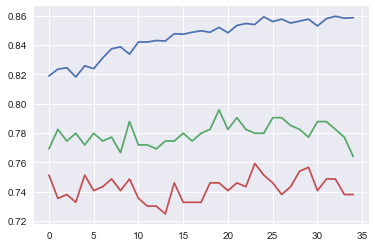

CRDataset
Train precision 0.8569867549668875
Valid precision 0.7824933687002652
Test precision 0.7452380952380953
CRDataset None 1.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



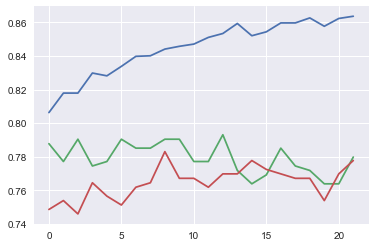


CRDataset
Train precision 0.85841059602649
Valid precision 0.773740053050398
Test precision 0.7695767195767196
CRDataset None 0.1


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

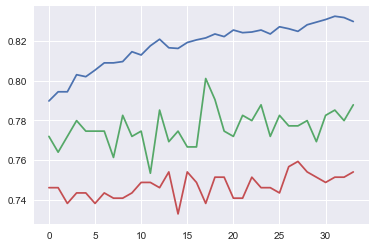

CRDataset
Train precision 0.82841059602649
Valid precision 0.7793103448275861
Test precision 0.7515873015873017
CRDataset None 0.01


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



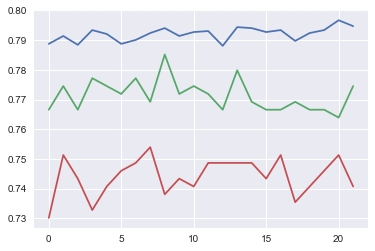


CRDataset
Train precision 0.7929470198675496
Valid precision 0.7689655172413794
Test precision 0.7455026455026456
CRDataset None 1e-05


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

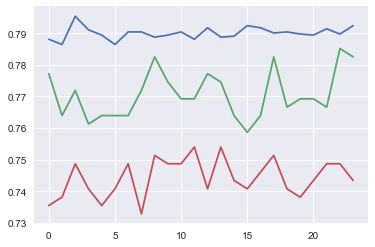

CRDataset
Train precision 0.7906291390728477
Valid precision 0.7708222811671088
Test precision 0.7444444444444445
CRDataset tfidf 100.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



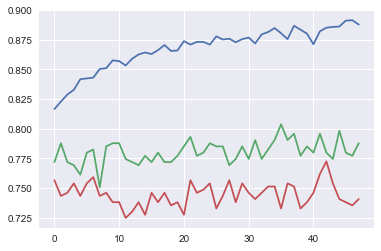


CRDataset
Train precision 0.8844039735099338
Valid precision 0.7835543766578248
Test precision 0.746031746031746
CRDataset tfidf 1.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

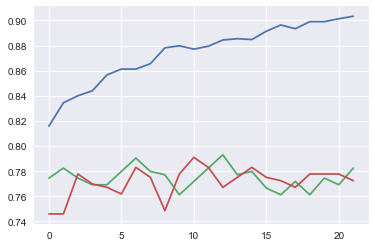

CRDataset
Train precision 0.8938410596026491
Valid precision 0.7737400530503978
Test precision 0.7746031746031747
CRDataset tfidf 0.1


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



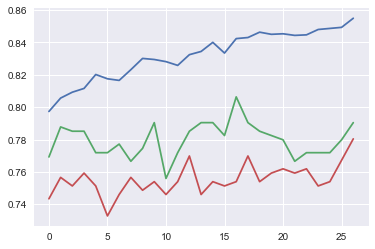


CRDataset
Train precision 0.8469867549668872
Valid precision 0.7790450928381963
Test precision 0.7619047619047619
CRDataset tfidf 0.01


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

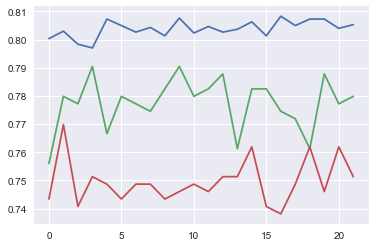

CRDataset
Train precision 0.8050993377483444
Valid precision 0.776657824933687
Test precision 0.7513227513227514
CRDataset tfidf 1e-05


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



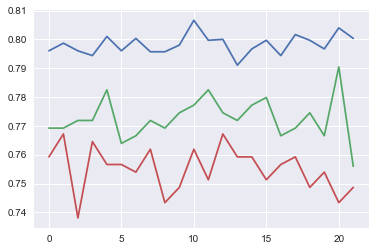


CRDataset
Train precision 0.7984105960264901
Valid precision 0.7726790450928382
Test precision 0.7547619047619047
CRDataset tfchi2 100.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

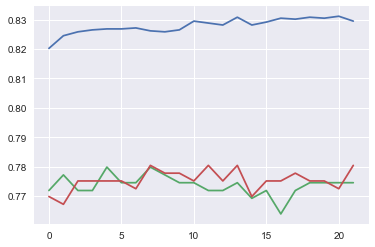

CRDataset
Train precision 0.8298675496688743
Valid precision 0.7721485411140584
Test precision 0.7756613756613756
CRDataset tfchi2 1.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



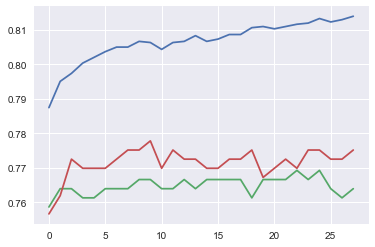


CRDataset
Train precision 0.8118543046357616
Valid precision 0.7655172413793103
Test precision 0.7724867724867724
CRDataset tfchi2 0.1


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

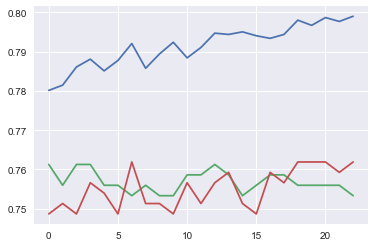

CRDataset
Train precision 0.7961258278145695
Valid precision 0.756233421750663
Test precision 0.7582010582010582
CRDataset tfchi2 0.01


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



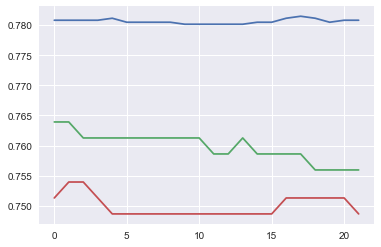


CRDataset
Train precision 0.7806953642384107
Valid precision 0.7578249336870027
Test precision 0.75
CRDataset tfchi2 1e-05


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

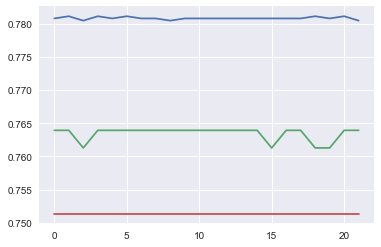

CRDataset
Train precision 0.7808278145695364
Valid precision 0.763129973474801
Test precision 0.7513227513227514
MRDataset None 100.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



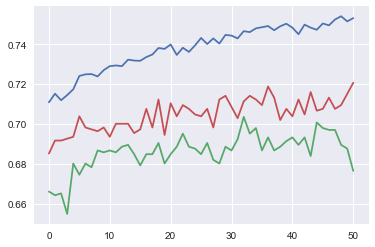


MRDataset
Train precision 0.7502169070230976
Valid precision 0.6912757973733583
Test precision 0.7113402061855669
MRDataset None 1.0


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

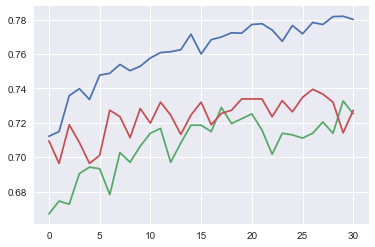

MRDataset
Train precision 0.7766209403212568
Valid precision 0.7161350844277674
Test precision 0.7300843486410498
MRDataset None 0.1


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



KeyboardInterrupt: 

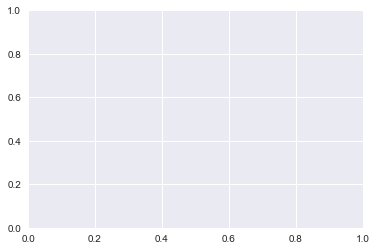

In [7]:

for dataset in datasets.ALL_DATASETS:
    for scheme in SimpleModel.BASIC_SCHEMES:
        for alpha in [100., 1.0, 0.1, 0.01, 0.00001]:
            print(dataset.name(), scheme, alpha)
            model = SimpleModel(classify.SkClassifier(), use_svd=True, weights=scheme)
            test_simple_model_with_gradient(
                model, dataset, alpha=alpha, tag=scheme, gradient_iters=None, results=results, dump=dump)


In [ ]:
pd.DataFrame(results)